In [1]:
import os
import numpy as np
import mne
print (mne.__version__)
from scipy.io import loadmat, savemat
from mne.io import read_raw_egi, read_raw_fif
#import matplotlib.pyplot as plt
#%matplotlib notebook
import sys
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs
sys.path.insert(0, 'C:/Users/Antoine/github/MEG_pareidolia/python_scripts/Functions')
import MEG_pareidolia_utils
from MEG_pareidolia_utils import *


from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs
from mne.io import read_raw_ctf, read_raw_fif
#from matplotlib.pyplot import plot as plt
#from matplotlib.pyplot import close as closefig
import mne
import numpy as np
from scipy.io import loadmat
import pandas as pd
import os
from IPython.display import clear_output
import time
import PARAMS
from PARAMS import *
import os.path as op
os.chmod('C:\\Users\\Antoine\\.mne\\mne-python.json', 0o777)

1.4.2


In [2]:
subj_list = [ '00', '01']
FS_SUBJDIR = 'D:/Science/PsychoPy_MEG/BIDS_data/derivatives/mne_python/MNE-sample-data/subjects'
RUN_LIST = ["1", "2", "3", "4", "5", "6", "7", "8"]


In [ ]:
for subj in subj_list:
    get_coregistration(FOLDERPATH, subj=subj, fsaverage_dir=FS_SUBJDIR)

In [2]:
subj = '00'
epochs_name, epochs_path = get_pareidolia_bids(FOLDERPATH, '00', 'pareidolia', 1, stage = 'epo_long', cond=None)
epochs = mne.read_epochs(epochs_path)
filepath = {
    'trans': op.join(FOLDERPATH, f'sub-{subj}', 'ses-recording', 'derivatives', f'sub-{subj}_ses-recording-trans.fif'),  # This is an approximated trans file using fsaverage
    'epoch': epochs_path,
    'noise': op.join(FOLDERPATH, f'sub-{subj}', 'ses-NOISE', 'meg', f'sub-{subj}_ses-NOISE_meg.ds')
}

data_cov = mne.compute_covariance(epochs, tmin=0.01, tmax=8, method="empirical")
noise_cov = compute_noise_cov(subj, FOLDERPATH)

custom_path = FOLDERPATH + '/derivatives/mne_python'
subjects_dir = str(mne.datasets.sample.data_path(path=custom_path)) + '\\subjects'

# already done
#mne.datasets.fetch_fsaverage(subjects_dir='D:\Science\PsychoPy_MEG\BIDS_data\derivatives\mne_python\MNE-sample-data\subjects')

# Create the source space
src = mne.setup_source_space('fsaverage', spacing='oct5', subjects_dir=subjects_dir, add_dist=False)

# Compute the BEM model for fsaverage
conductivity = (0.3,)  # for single layer
model = mne.make_bem_model(subject='fsaverage', ico=4, conductivity=conductivity, subjects_dir=subjects_dir)
bem = mne.make_bem_solution(model)
trans = filepath['trans']  # Make sure this points to the correct file

Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_long.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_7348\1007952270.py:3: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_long.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epochs_path)


    Found the data of interest:
        t =   -1500.00 ...    8000.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
52 matching events found
No baseline correction applied
0 projection items activated
Computing rank from data with rank=None
    Using tolerance 5.3e-08 (2.2e-16 eps * 270 dim * 8.9e+05  max singular value)
    Estimated rank (mag): 270
    MAG: rank 270 computed from 270 data channels with 0 projectors
Reducing data rank from 270 -> 270
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 498628
[done]
ds directory : D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-NOISE\meg\sub-00_ses-NOISE_meg.ds
    res4 data read.
    hc data read.
    Separate EEG position data file read.
    Quaternion matching (desired vs. transformed):
       0.00   80.00    0.00 mm <->    0.00   80.00    0.00 mm (orig :  -56.57   56.57 -270.00 mm) diff =    0.000 mm
       0.00  -80.00    0.00 mm <->    0.00  -80.00    0.00 mm (orig :   56.57  -56.57

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    3.1s


Using up to 341 segments
Number of samples used : 81840
[done]
Setting up the source space with the following parameters:

SUBJECTS_DIR = D:\Science\PsychoPy_MEG\BIDS_data\derivatives\mne_python\MNE-sample-data\subjects
Subject      = fsaverage
Surface      = white
Octahedron subdivision grade 5

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading D:\Science\PsychoPy_MEG\BIDS_data\derivatives\mne_python\MNE-sample-data\subjects\fsaverage\surf\lh.white...
Mapping lh fsaverage -> oct (5) ...


ModuleNotFoundError: nibabel is required to read surface geometry, got:
No module named 'nibabel'

In [ ]:
!pip

In [ ]:
import mne

brain = mne.viz.plot_alignment(subject='fsaverage', src=src, subjects_dir=subjects_dir, 
                               surfaces='white', trans=trans, show_axes=True, 
                               meg=False, eeg=False)


RuntimeError: Could not load any valid 3D backend
pyvistaqt: No module named 'pyvista'
notebook: No module named 'ipyevents'

 install pyvistaqt, using pip or conda:
'pip install pyvistaqt'
'conda install -c conda-forge pyvistaqt'

 or install ipywidgets, if using a notebook backend
'pip install ipywidgets'
'conda install -c conda-forge ipywidgets'

In [3]:
for subj in subj_list:
    for run in RUN_LIST:
        try:
            epochs_name, epochs_path = get_pareidolia_bids(FOLDERPATH, subj, 'pareidolia', run, stage = 'epo_long', cond=None)
            epochs = mne.read_epochs(epochs_path)
            filepath = {
                'trans': op.join(FOLDERPATH, f'sub-{subj}', 'ses-recording', 'derivatives', f'sub-{subj}_ses-recording-trans.fif'),  # This is an approximated trans file using fsaverage
                'epoch': epochs_path,
                'noise': op.join(FOLDERPATH, f'sub-{subj}', 'ses-NOISE', 'meg', f'sub-{subj}_ses-NOISE_meg.ds')
            }

            data_cov = mne.compute_covariance(epochs, tmin=0.01, tmax=8, method="empirical")
            noise_cov = compute_noise_cov(subj, FOLDERPATH)

            custom_path = FOLDERPATH + '/derivatives/mne_python'
            subjects_dir = str(mne.datasets.sample.data_path(path=custom_path)) + '\\subjects'

            # already done
            #mne.datasets.fetch_fsaverage(subjects_dir='D:\Science\PsychoPy_MEG\BIDS_data\derivatives\mne_python\MNE-sample-data\subjects')

            # Create the source space
            src = mne.setup_source_space('fsaverage', spacing='oct5', subjects_dir=subjects_dir, add_dist=False)

            # Compute the BEM model for fsaverage
            conductivity = (0.3,)  # for single layer
            model = mne.make_bem_model(subject='fsaverage', ico=4, conductivity=conductivity, subjects_dir=subjects_dir)
            bem = mne.make_bem_solution(model)

            # Create the forward model
            fwd = mne.make_forward_solution(epochs.info, trans=filepath['trans'], src=src, bem=bem, meg=True, eeg=False)

            # Compute the inverse solution for your epochs
            inverse_operator = mne.minimum_norm.make_inverse_operator(epochs.info, fwd, noise_cov, loose=0.2, depth=0.8)
            source_path = op.join(FOLDERPATH, f'sub-{subj}', 'ses-recording', 'derivatives', 'source')
            '''if not op.exists(source_path):
                os.mkdir(source_path)
            for i in range(len(epochs)):
                stc = mne.minimum_norm.apply_inverse_epochs(epochs[i], inverse_operator, lambda2=1.0/3.0**2, method='MNE')[0]
                # Save each STC to the specified path in the HDF5 format
                save_path = f"{source_path}/sub-{subj}_ses-recording_task-pareidolia_run-{run}_epo-{i+1}"
                stc.save(save_path, ftype='h5', overwrite=True)'''
        except:
            continue
            



Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_long.fif ...


C:\Users\Antoine\AppData\Local\Temp\ipykernel_700\1558107084.py:5: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-1_epo_long.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epochs_path)


    Found the data of interest:
        t =   -1500.00 ...    8000.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
52 matching events found
No baseline correction applied
0 projection items activated
Computing rank from data with rank=None


C:\Users\Antoine\AppData\Local\Temp\ipykernel_700\1558107084.py:5: RuntimeWarning: This filename (D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_long.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epochs_path)


Reading D:\Science\PsychoPy_MEG\BIDS_data\sub-00\ses-recording\meg\sub-00_ses-recording_task-pareidolia_run-2_epo_long.fif ...
    Found the data of interest:
        t =   -1500.00 ...    8000.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
52 matching events found
No baseline correction applied
0 projection items activated
Computing rank from data with rank=None


In [15]:
epochs[1:3]

Number of events,2
Events,Image_on_par: 2
Time range,-1.500 – 8.000 s
Baseline,-1.500 – 0.000 s


In [18]:
stc = mne.minimum_norm.apply_inverse_epochs(epochs[3], inverse_operator, lambda2=1.0/3.0**2, method='MNE')[0]

Preparing the inverse operator for use...


    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 270 (0 small eigenvalues omitted)
Picked 270 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Processing epoch : 1 / 1
combining the current components...
[done]


In [9]:
source_path = op.join(base_directory, f'sub-{subj}', 'ses-recording', 'derivatives', 'source')
if not op.exists(source_path):
    os.mkdir(source_path)

# Save each STC to the specified path in the HDF5 format
for idx, stc in enumerate(stcs):
    save_path = f"{source_path}/sub-{subj}_ses-recording_task-pareidolia_run-{run}_epo-{idx+1}"
    stc.save(save_path, ftype='h5')

[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]
[done]


In [50]:
# 1. Get Labels
labels = mne.read_labels_from_annot('fsaverage', parc='aparc', subjects_dir=subjects_dir)
dmn_regions = ['medialorbitofrontal', 'rostralanteriorcingulate', 'rostralmiddlefrontal', 
               'superiorfrontal', 'posteriorcingulate', 'isthmuscingulate', 'precuneus', 
               'lateralorbitofrontal', 'parahippocampal', 'fusiform', 'entorhinal']

# Filter labels for DMN regions
dmn_labels = [label for label in labels if any(region in label.name for region in dmn_regions)]

# 2. Extract Activation in ROI
stc_data = []
for stc in stcs:
    mean_vals = []
    for label in dmn_labels:
        mean_vals.append(stc.extract_label_time_course(label, src, mode='mean'))
    stc_data.append(np.mean(mean_vals, axis=(2)))  # Averaging over all DMN regions and time

# Convert to array for convenience
stc_data = np.array(stc_data)

# 3. Grouping by Condition and 4. Statistical Comparison
# This part remains unchanged from the previous code.

# Extract metadata to a list
metadata_list = [epochs[i].metadata for i in range(len(epochs))]

# Now, use this metadata list for condition separation
parei_epochs = [idx for idx, meta in enumerate(metadata_list) if meta['n_obj_class'].item() == 1]
non_parei_epochs = [idx for idx, meta in enumerate(metadata_list) if meta['n_obj_class'].item() == 2]

zero_data = np.zeros((len(stcs[0].data), stcs[0].times.shape[0]))

# Average stc_data over epochs for each DMN region
mean_dmn_data = np.mean(stc_data, axis=0)

for idx, label in enumerate(dmn_labels):
    vertices_in_label, stc_vertices_idx = np.intersect1d(label.vertices, stcs[0].vertices, return_indices=True)
    if vertices_in_label.size > 0:
        zero_data[stc_vertices_idx, :] = mean_dmn_data[idx]


parei_data_avg = np.mean([zero_data[i] for i in parei_epochs], axis=0)
non_parei_data_avg = np.mean([zero_data[i] for i in non_parei_epochs], axis=0)

# 3D Plot for Parei Condition
brain_parei = stcs[0].copy()
brain_parei.data = parei_stcs_avg
brain_parei.plot(subjects_dir=subjects_dir, hemi='both', surface='inflated',
                 views=['lat', 'med'], time_viewer=False, title='Parei DMN Activity',
                 clim=dict(kind='value', lims=[0, 2.9681997286607184e-11, 3.6089562933891068e-09]))

# 3D Plot for Non-Parei Condition
brain_non_parei = stcs[0].copy()
brain_non_parei.data = non_parei_stcs_avg
brain_non_parei.plot(subjects_dir=subjects_dir, hemi='both', surface='inflated',
                     views=['lat', 'med'], time_viewer=False, title='Non-Parei DMN Activity',
                     clim=dict(kind='value', lims=[0, 2.9681997286607184e-11, 3.6089562933891068e-09]))



Reading labels from parcellation...
   read 35 labels from D:\Science\PsychoPy_MEG\BIDS_data\derivatives\mne_python\MNE-sample-data\subjects\fsaverage\label\lh.aparc.annot
   read 34 labels from D:\Science\PsychoPy_MEG\BIDS_data\derivatives\mne_python\MNE-sample-data\subjects\fsaverage\label\rh.aparc.annot
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode

ValueError: too many values to unpack (expected 2)

In [49]:
    vertices_in_label

array([   0,   83,  120,  267,  271,  760,  829,  967, 1054, 1140, 1199,
       1749, 1792, 2047, 2184, 2326, 2710, 2742, 2807, 2828, 3248, 3342,
       3569, 3596, 3795, 3910, 3942, 4021, 4282, 4420, 4624, 4682],
      dtype=int64)

In [47]:
zero_data = np.zeros((len(stcs[0].data), stcs[0].times.shape[0]))
for idx, label in enumerate(dmn_labels):
    vertices_in_label = np.intersect1d(label.vertices, stcs[0].vertices, return_indices=True)[1]
    zero_data[vertices_in_label, :] = np.repeat(stc_data[:, idx][:, np.newaxis], stcs[0].times.shape[0], axis=1)

parei_data_avg = np.mean([zero_data[i] for i in parei_epochs], axis=0)
non_parei_data_avg = np.mean([zero_data[i] for i in non_parei_epochs], axis=0)

# 3D Plot for Parei Condition
brain_parei = stcs[0].copy()
brain_parei.data = parei_data_avg
brain_parei.plot(subjects_dir=subjects_dir, hemi='both', surface='inflated',
                 views=['lat', 'med'], time_viewer=False, title='Parei DMN Activity',
                 clim=dict(kind='value', lims=[0, 2.9681997286607184e-11, 3.6089562933891068e-09]))

# 3D Plot for Non-Parei Condition
brain_non_parei = stcs[0].copy()
brain_non_parei.data = non_parei_data_avg
brain_non_parei.plot(subjects_dir=subjects_dir, hemi='both', surface='inflated',
                     views=['lat', 'med'], time_viewer=False, title='Non-Parei DMN Activity',
                     clim=dict(kind='value', lims=[0, 2.9681997286607184e-11, 3.6089562933891068e-09]))


ValueError: shape mismatch: value array of shape (52,11401,1) could not be broadcast to indexing result of shape (7,11401)

In [19]:
# 1. Calculate Average Activity
parei_data_avg = np.mean(parei_data, axis=0).squeeze()  # Average over all parei epochs
non_parei_data_avg = np.mean(non_parei_data, axis=0).squeeze()  

# 2. Statistical Comparison
from scipy.stats import ttest_rel
t_stat, p_val = ttest_rel(parei_data_avg, non_parei_data_avg)

# Combine DMN labels into one label for visualization
dmn_label_combined = dmn_labels[0]
for label in dmn_labels[1:]:
    dmn_label_combined += label

# 3. Create 3D Plot for Parei Condition
brain_parei = stcs[0].copy()
brain_parei.data = np.mean(stc_data[parei_epochs], axis=0)
brain_parei.plot(subjects_dir=subjects_dir, hemi='both', surface='inflated',
                 views=['lat', 'med'], time_viewer=False, title='Parei DMN Activity',
                 clim=dict(kind='value', lims=[0, 2, 4]))

# 3D Plot for Non-Parei Condition
brain_non_parei = stcs[0].copy()
brain_non_parei.data = np.mean(stc_data[non_parei_epochs], axis=0)
brain_non_parei.plot(subjects_dir=subjects_dir, hemi='both', surface='inflated',
                     views=['lat', 'med'], time_viewer=False, title='Non-Parei DMN Activity',
                     clim=dict(kind='value', lims=[0, 2, 4]))

print("T-statistic:", t_stat)
print("P-value:", p_val)

ValueError: The first dimension of the data array must match the number of vertices (1 != 2052)

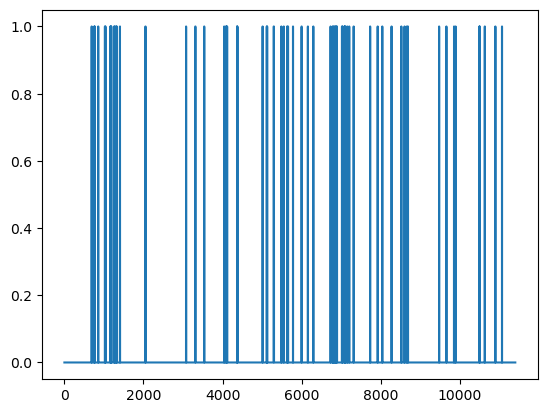

In [12]:
plt.plot(p_val[0]<0.05)

In [5]:
import pyvistaqt
import ipywidgets
import os
os.environ["QT_API"] = "pyqt5"  # or "pyside2" if you installed PySide2
mne.viz.set_3d_backend("pyvista")
stc = stcs[0]  # First epoch
brain = stc.plot(subject='fsaverage', surface='inflated', hemi='both', subjects_dir=subjects_dir, time_viewer=True)


Using pyvistaqt 3d backend.

Using control points [1.11193169e-09 1.31661656e-09 3.45937681e-09]


c:\Users\Antoine\anaconda3\envs\biotuner\lib\site-packages\pyvista\plotting\plotting\__init__.py:23: PyVistaDeprecationWarning: The `pyvista.plotting.plotting` module has been deprecated. `_ALL_PLOTTERS` is now imported as: `from pyvista.plotting import _ALL_PLOTTERS`.
  warnings.warn(


For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

